In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from services import DataReader

y_row, X_row = zip(*DataReader().read_hmdb_diseases().items())

df_row = pd.DataFrame().from_records(X_row).T
df_row.columns = y_row

In [4]:
y_hmdb, X_hmdb = zip(*DataReader().read_json('../dataset/solutions/hmdb_averaging_disease_analysis.json').items())

dataset_bc = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

In [5]:
X_bc_h, y_bc_h = zip(*filter(lambda x: x[1] == 'h', zip(*dataset_bc)))

In [6]:
X = X_hmdb + X_bc_h
y = y_hmdb + y_bc_h

In [7]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pre = pre.fit_transform(X, y)

X_results, y_results = zip(*filter(lambda x: x[1] != 'h', zip(X_pre, y)))

In [8]:
df = pd.DataFrame().from_records(X_results).T
df.columns = y_results

In [9]:
df.round(3)

,propionic acidemia Adult (>18 years old)#Male#Urine#,diabetes Adult (>18 years old)#Male#Blood#,maple syrup urine disease Adult (>18 years old)#Female#Urine#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Female#Urine#,lewy body disease Adult (>18 years old)#Female#Saliva#,diabetes Adult (>18 years old)#Female#Blood#,celiac disease Adult (>18 years old)#Female#Blood#,uremia Adult (>18 years old)#Male#Blood#,aminoaciduria Adult (>18 years old)#Female#Urine#,adpkd Adult (>18 years old)#Female#Urine#,celiac disease Adult (>18 years old)#Male#Blood#,meningitis Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,canavan disease Adult (>18 years old)#Female#Blood#,heart failure Adult (>18 years old)#Male#Blood#,epilepsy Adult (>18 years old)#Female#Blood#,propionic acidemia Adult (>18 years old)#Female#Urine#,aminoaciduria Adult (>18 years old)#Male#Urine#,treated celiac disease Children (1-13 years old)#Not Specified#Feces#,lung cancer Adult (>18 years old)#Male#Urine#,heart transplant Adult (>18 years old)#Male#Blood#,lewy body disease Adult (>18 years old)#Male#Saliva#,heart failure Adult (>18 years old)#Female#Blood#,heart transplant Adult (>18 years old)#Female#Blood#,uremia Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Urine#,epilepsy Adult (>18 years old)#Male#Blood#,frontotemporal lobe dementia Adult (>18 years old)#Male#Saliva#,canavan disease Adult (>18 years old)#Male#Blood#,schizophrenia Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,cirrhosis Adult (>18 years old)#Male#Blood#,schizophrenia Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,lung cancer Adult (>18 years old)#Female#Urine#,eosinophilic esophagitis Children (1 - 13 years old)#Not Specified#Urine#,gastroesophageal reflux disease Children (1 - 13 years old)#Not Specified#Urine#,schizophrenia Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,maple syrup urine disease Adult (>18 years old)#Male#Urine#,adpkd Adult (>18 years old)#Male#Urine#,hemodialysis Adult (>18 years old)#Male#Blood#,meningitis Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,schizophrenia Adult (>18 years old)#Male#Blood#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Male#Urine#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,cirrhosis Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Female#Urine#
Alanine and aspartate metabolism_dif,398.801,354.466,404.846,310.686,2.864,321.587,343.788,198.601,510.704,342.236,343.788,449.623,337.290,750.153,169.216,417.939,555.519,353.988,319.687,243.361,612.911,745.020,244.460,185.145,607.936,564.681,150.510,232.486,316.894,440.734,581.473,432.092,319.687,-281.726,172.918,346.667,246.103,418.234,342.236,320.988,449.623,296.733,304.988,246.103,578.750,564.681
Alkaloid synthesis_dif,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
Aminosugar metabolism_dif,318.626,639.626,318.074,514.245,320.686,642.358,538.988,565.010,533.786,543.108,538.988,539.861,538.554,281.162,541.556,318.020,532.936,532.844,540.099,540.823,298.740,279.385,544.850,567.234,63.970,542.181,543.852,136.622,538.834,541.300,537.406,539.848,540.099,-83.972,532.703,539.338,541.631,317.755,543.108,532.511,539.861,544.698,514.908,541.631,532.050,542.181
Androgen and estrogen synthesis and metabolism_dif,0.000,-17.586,0.000,0.000,0.000,-17.593,-17.698,-17.635,-17.634,-17.636,-17.698,-17.654,-17.642,0.000,-18.045,0.000,-17.593,-17.637,0.000,-17.651,0.000,0.000,-17.620,-17.640,0.000,-17.595,-17.670,0.000,-17.606,-17.632,0.000,-17.617,0.000,-0.000,

In [10]:
from scipy.spatial.distance import pdist, squareform


df_squareform = pd.DataFrame(squareform(pdist(df.T, 'cosine'))).round(3)

df_squareform.columns = y_results
df_squareform.index = list(y_results)

df_squareform

,propionic acidemia Adult (>18 years old)#Male#Urine#,diabetes Adult (>18 years old)#Male#Blood#,maple syrup urine disease Adult (>18 years old)#Female#Urine#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Female#Urine#,lewy body disease Adult (>18 years old)#Female#Saliva#,diabetes Adult (>18 years old)#Female#Blood#,celiac disease Adult (>18 years old)#Female#Blood#,uremia Adult (>18 years old)#Male#Blood#,aminoaciduria Adult (>18 years old)#Female#Urine#,adpkd Adult (>18 years old)#Female#Urine#,celiac disease Adult (>18 years old)#Male#Blood#,meningitis Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,canavan disease Adult (>18 years old)#Female#Blood#,heart failure Adult (>18 years old)#Male#Blood#,epilepsy Adult (>18 years old)#Female#Blood#,propionic acidemia Adult (>18 years old)#Female#Urine#,aminoaciduria Adult (>18 years old)#Male#Urine#,treated celiac disease Children (1-13 years old)#Not Specified#Feces#,lung cancer Adult (>18 years old)#Male#Urine#,heart transplant Adult (>18 years old)#Male#Blood#,lewy body disease Adult (>18 years old)#Male#Saliva#,heart failure Adult (>18 years old)#Female#Blood#,heart transplant Adult (>18 years old)#Female#Blood#,uremia Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Urine#,epilepsy Adult (>18 years old)#Male#Blood#,frontotemporal lobe dementia Adult (>18 years old)#Male#Saliva#,canavan disease Adult (>18 years old)#Male#Blood#,schizophrenia Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,cirrhosis Adult (>18 years old)#Male#Blood#,schizophrenia Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,lung cancer Adult (>18 years old)#Female#Urine#,eosinophilic esophagitis Children (1 - 13 years old)#Not Specified#Urine#,gastroesophageal reflux disease Children (1 - 13 years old)#Not Specified#Urine#,schizophrenia Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,maple syrup urine disease Adult (>18 years old)#Male#Urine#,adpkd Adult (>18 years old)#Male#Urine#,hemodialysis Adult (>18 years old)#Male#Blood#,meningitis Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,schizophrenia Adult (>18 years old)#Male#Blood#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Male#Urine#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,cirrhosis Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Female#Urine#
propionic acidemia Adult (>18 years old)#Male#Urine#,0.000,0.246,0.000,0.050,0.989,0.242,0.216,0.268,0.284,0.304,0.216,0.233,0.213,0.109,0.214,0.000,0.291,0.269,0.084,0.265,0.952,0.107,0.263,0.270,1.132,0.206,0.210,0.949,0.216,0.309,0.204,0.310,0.084,0.949,0.215,0.086,0.218,0.000,0.304,0.193,0.233,0.077,0.048,0.218,0.231,0.206
diabetes Adult (>18 years old)#Male#Blood#,0.246,0.000,0.251,0.145,1.026,0.000,0.087,0.093,0.068,0.070,0.087,0.029,0.064,0.450,0.059,0.251,0.066,0.128,0.128,0.158,0.980,0.445,0.155,0.092,1.189,0.066,0.061,0.958,0.067,0.077,0.070,0.082,0.128,0.737,0.107,0.131,0.066,0.244,0.070,0.076,0.029,0.132,0.142,0.066,0.080,0.066
maple syrup urine disease Adult (>18 years old)#Female#Urine#,0.000,0.251,0.000,0.051,0.987,0.246,0.218,0.270,0.288,0.307,0.218,0.237,0.215,0.107,0.217,0.000,0.295,0.271,0.085,0.266,0.950,0.105,0.264,0.272,1.134,0.208,0.213,0.951,0.219,0.312,0.207,0.312,0.085,0.954,0.216,0.086,0.220,0.000,0.307,0.196,0.237,0.077,0.050,0.220,0.234,0.208
3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Female#Urine#,0.050,0.145,0.051,0.000,1.055,0.141,0.101,0.154,0.164,0.173,0.101,0.134,0.096,0.201,0.098,0.050,0.170,0.145,0.026,0.138,1.019,0.201,0.138,0.153,1.201,0.099,0.092,1.039,0.100,0.184,0.094,0.183,0.026,0.956,0.106,0.018,0.103,0.050,0.173,0.097,0.134,0.011,0.000,0.103,0.112,0.099
lewy body disease Adult (>18 years old)#Female#Saliva#,0.989,1.026,0.987,1.055,0.000,1.

In [11]:
df_squareform.filter(like="alzheimer's disease Adult").filter(like="alzheimer's disease Adult", axis=0)

,alzheimer's disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Urine#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Female#Urine#
alzheimer's disease Adult (>18 years old)#Male#Saliva#,0.000,1.136,1.157,1.157,1.136
alzheimer's disease Adult (>18 years old)#Male#Urine#,1.136,0.000,0.006,0.006,0.000
alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,1.157,0.006,0.000,0.000,0.006
alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,1.157,0.006,0.000,0.000,0.006
alzheimer's disease Adult (>18 years old)#Female#Urine#,1.136,0.000,0.006,0.006,0.000


In [12]:
df_row.filter(like="alzheimer's disease Adult").dropna(how="all")

,alzheimer's disease Adult (>18 years old)#Male#Urine#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Female#Urine#
4hpro_LT_e,0.400,NaN,NaN,NaN,0.400
C01507_c,NaN,NaN,0.215,0.215,NaN
HC00342_m,NaN,15.279,NaN,NaN,NaN
Lcystin_e,26.598,NaN,25.897,25.897,26.598
abt_e,NaN,NaN,-0.290,-0.290,NaN
ade_e,NaN,-0.155,NaN,NaN,NaN
adn_l,NaN,0.667,NaN,NaN,NaN
ala_L_c,NaN,0.500,NaN,NaN,NaN
amp_e,NaN,0.264,NaN,NaN,NaN
arg_L_c,0.320,1.641,-3.117,-3.117,0.320


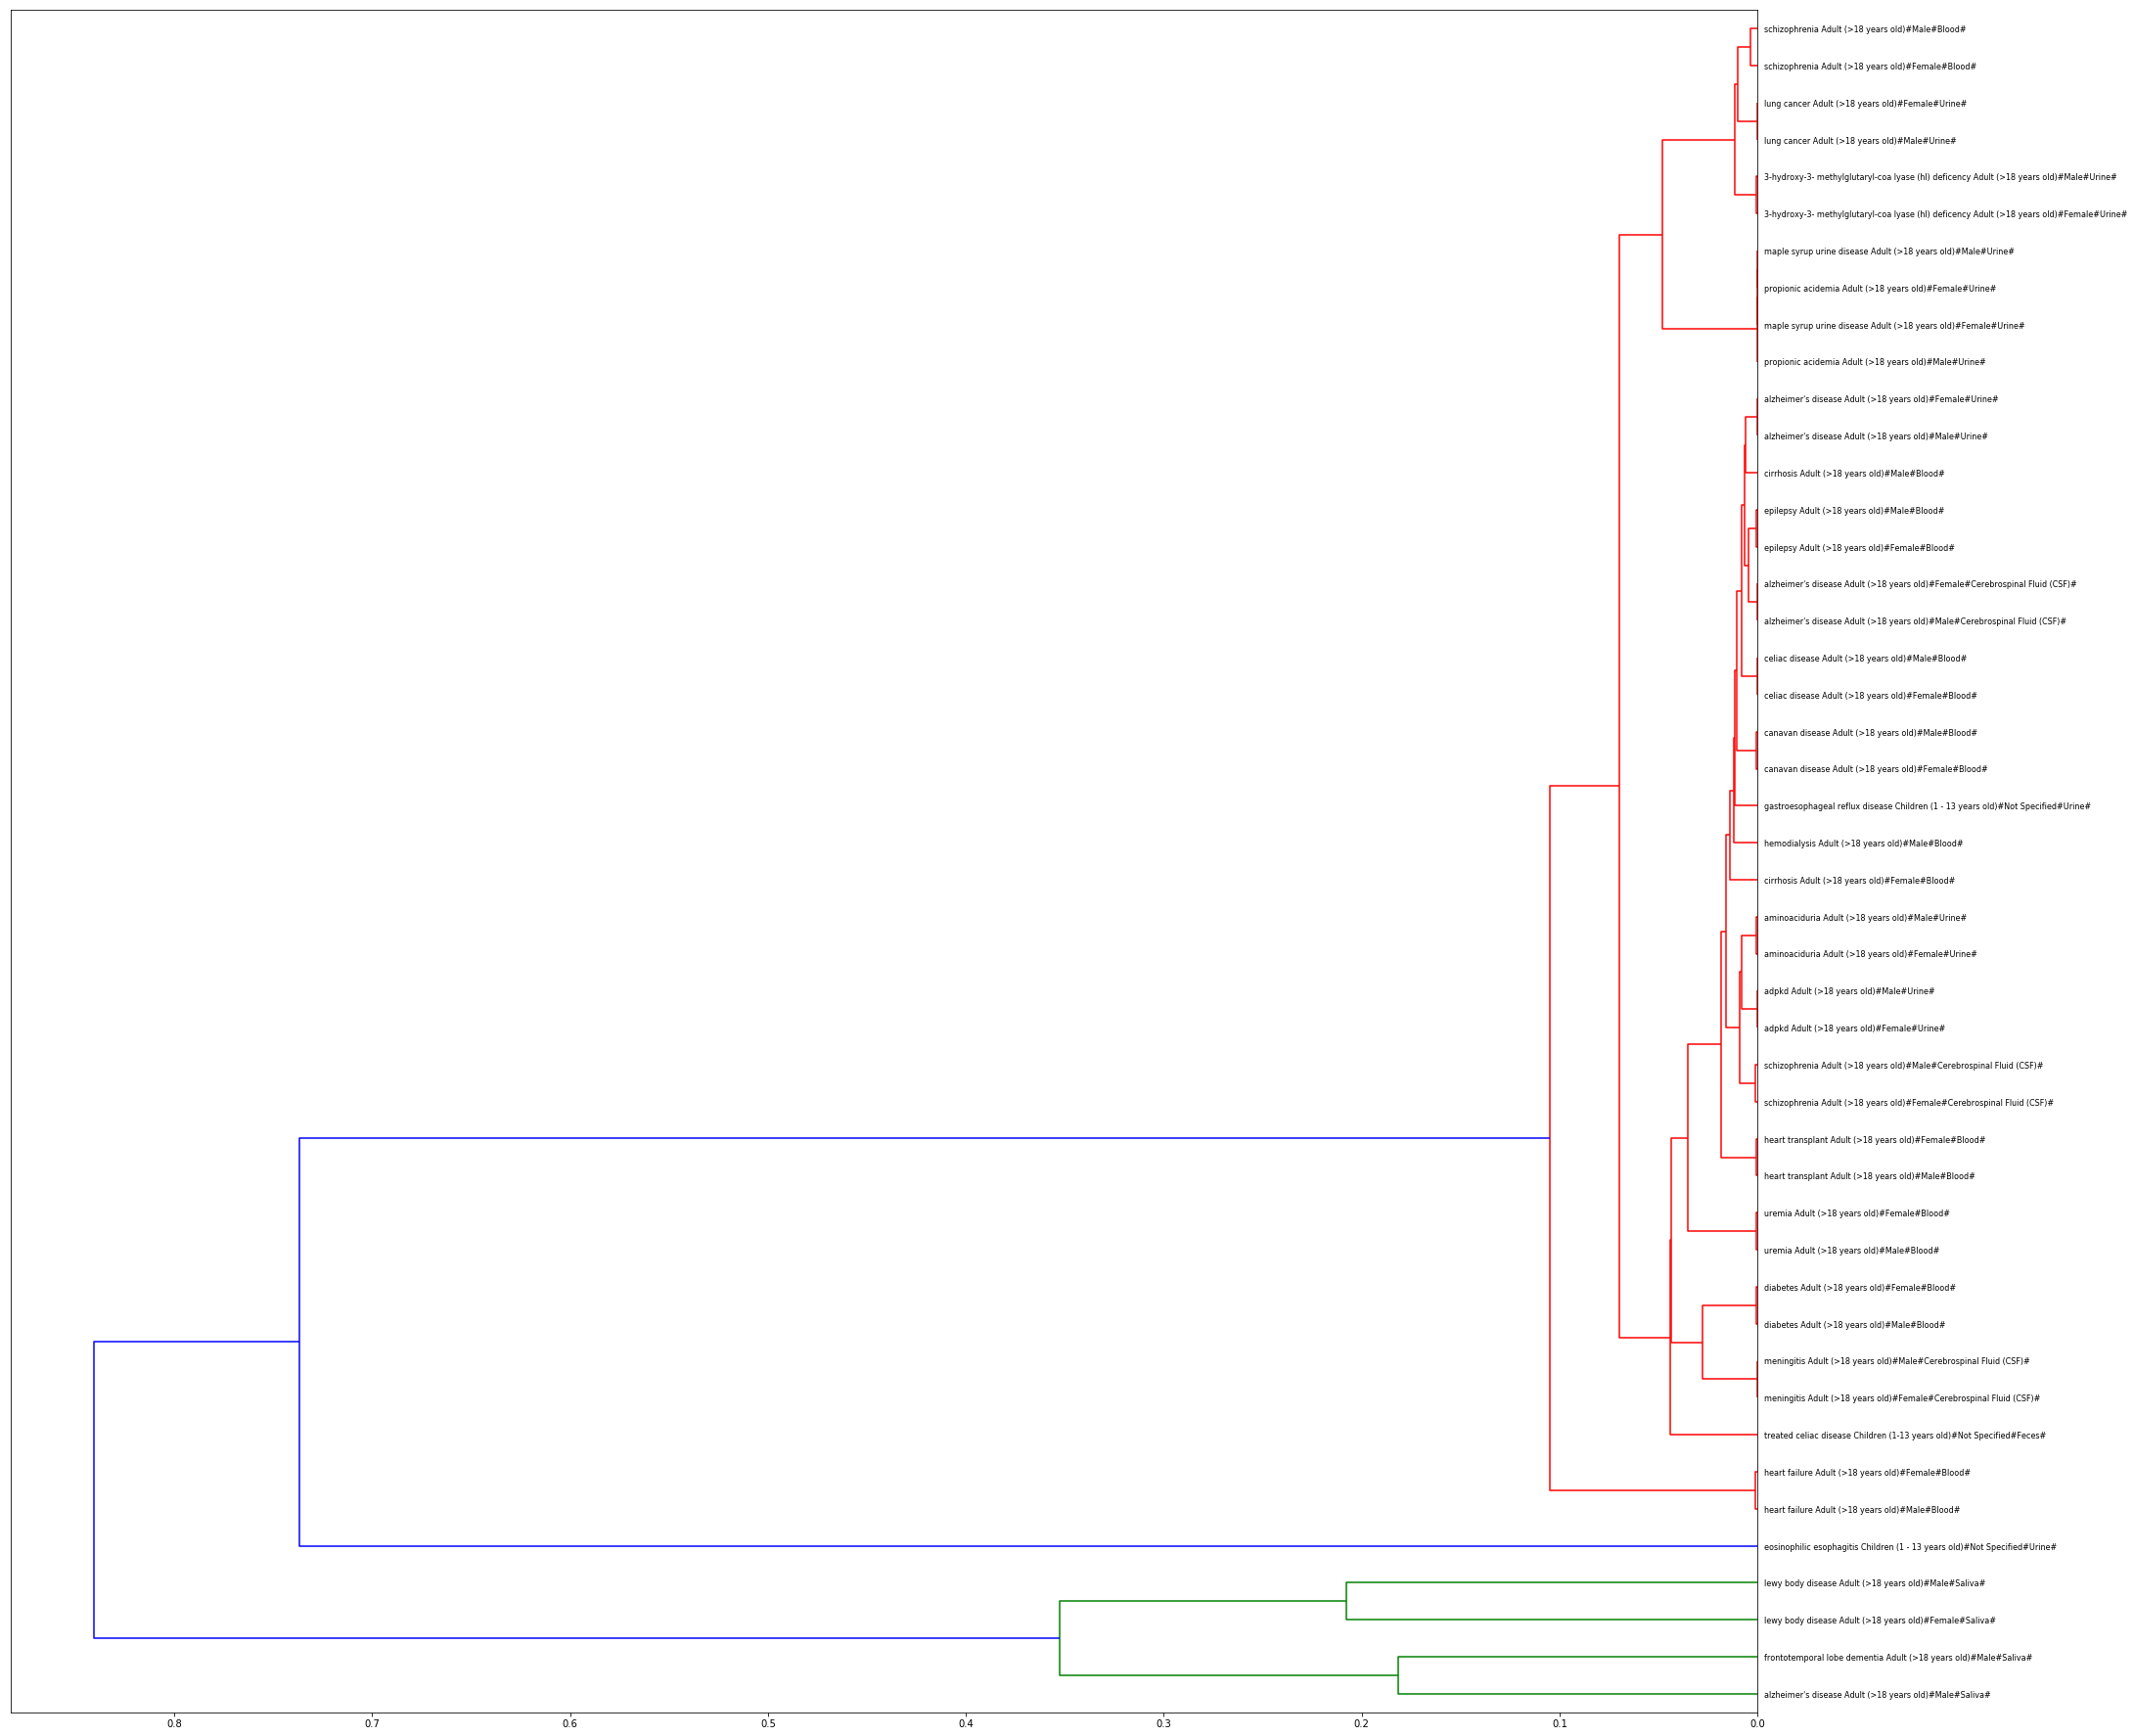

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (32,32)

linkage_matrix = linkage(pdist(df.T, 'cosine'))
dendrogram(linkage_matrix, labels=y_results, orientation='left')


plt.show()

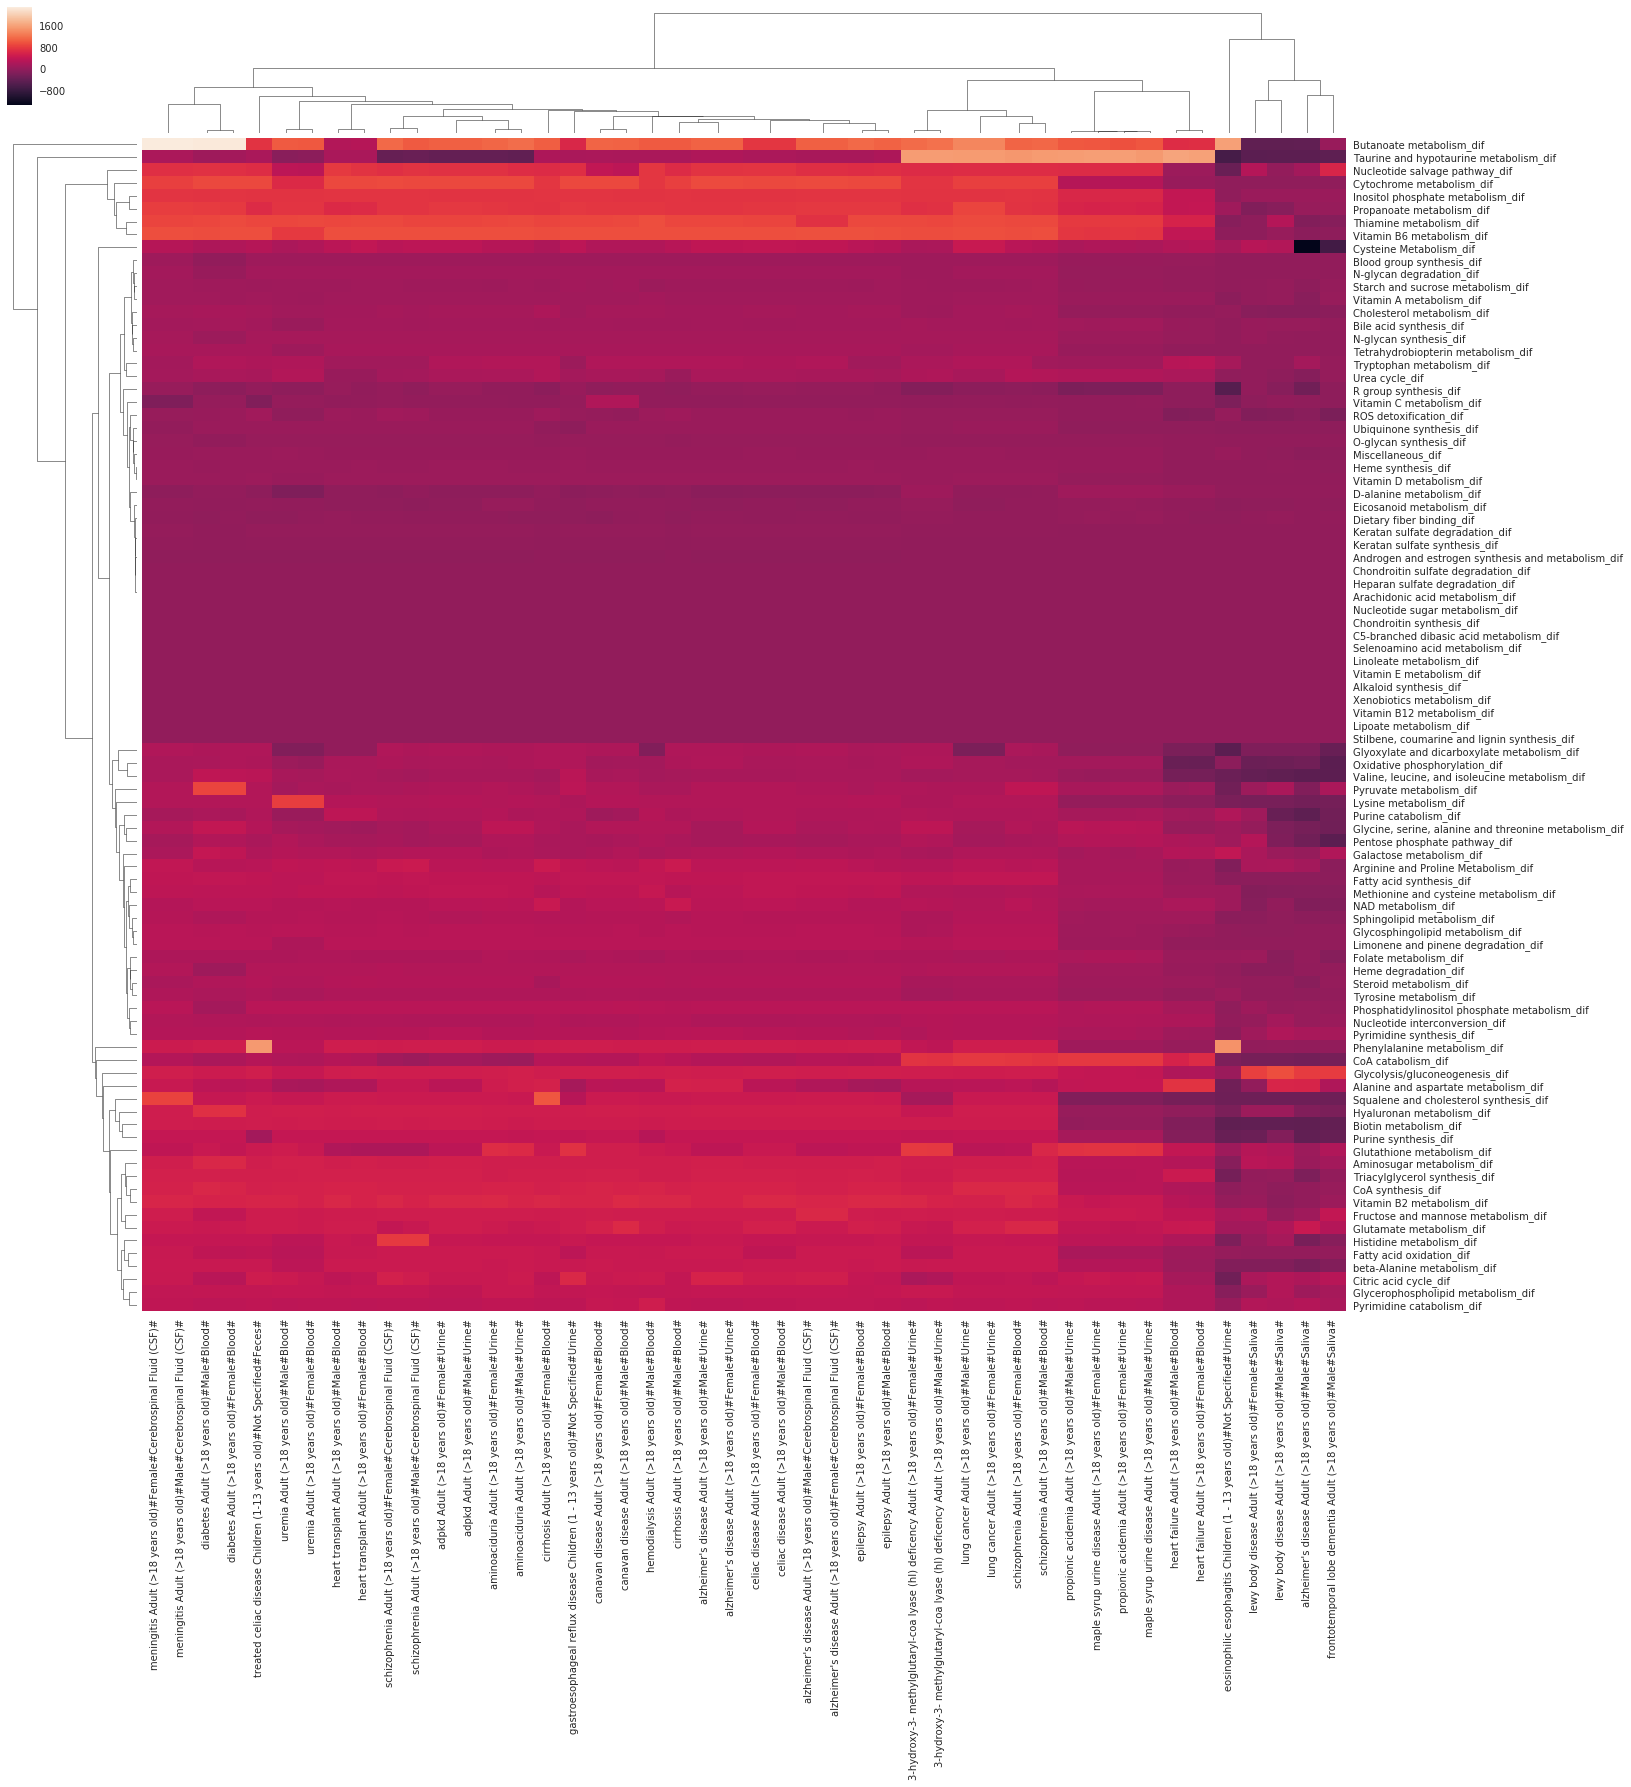

In [14]:
%matplotlib inline

import seaborn as sns
from scipy.cluster.hierarchy import linkage

sns.set(color_codes=True)

sns.clustermap(df, figsize=(24, 24))

/opt/conda/lib/python3.5/site-packages/seaborn/matrix.py:603: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



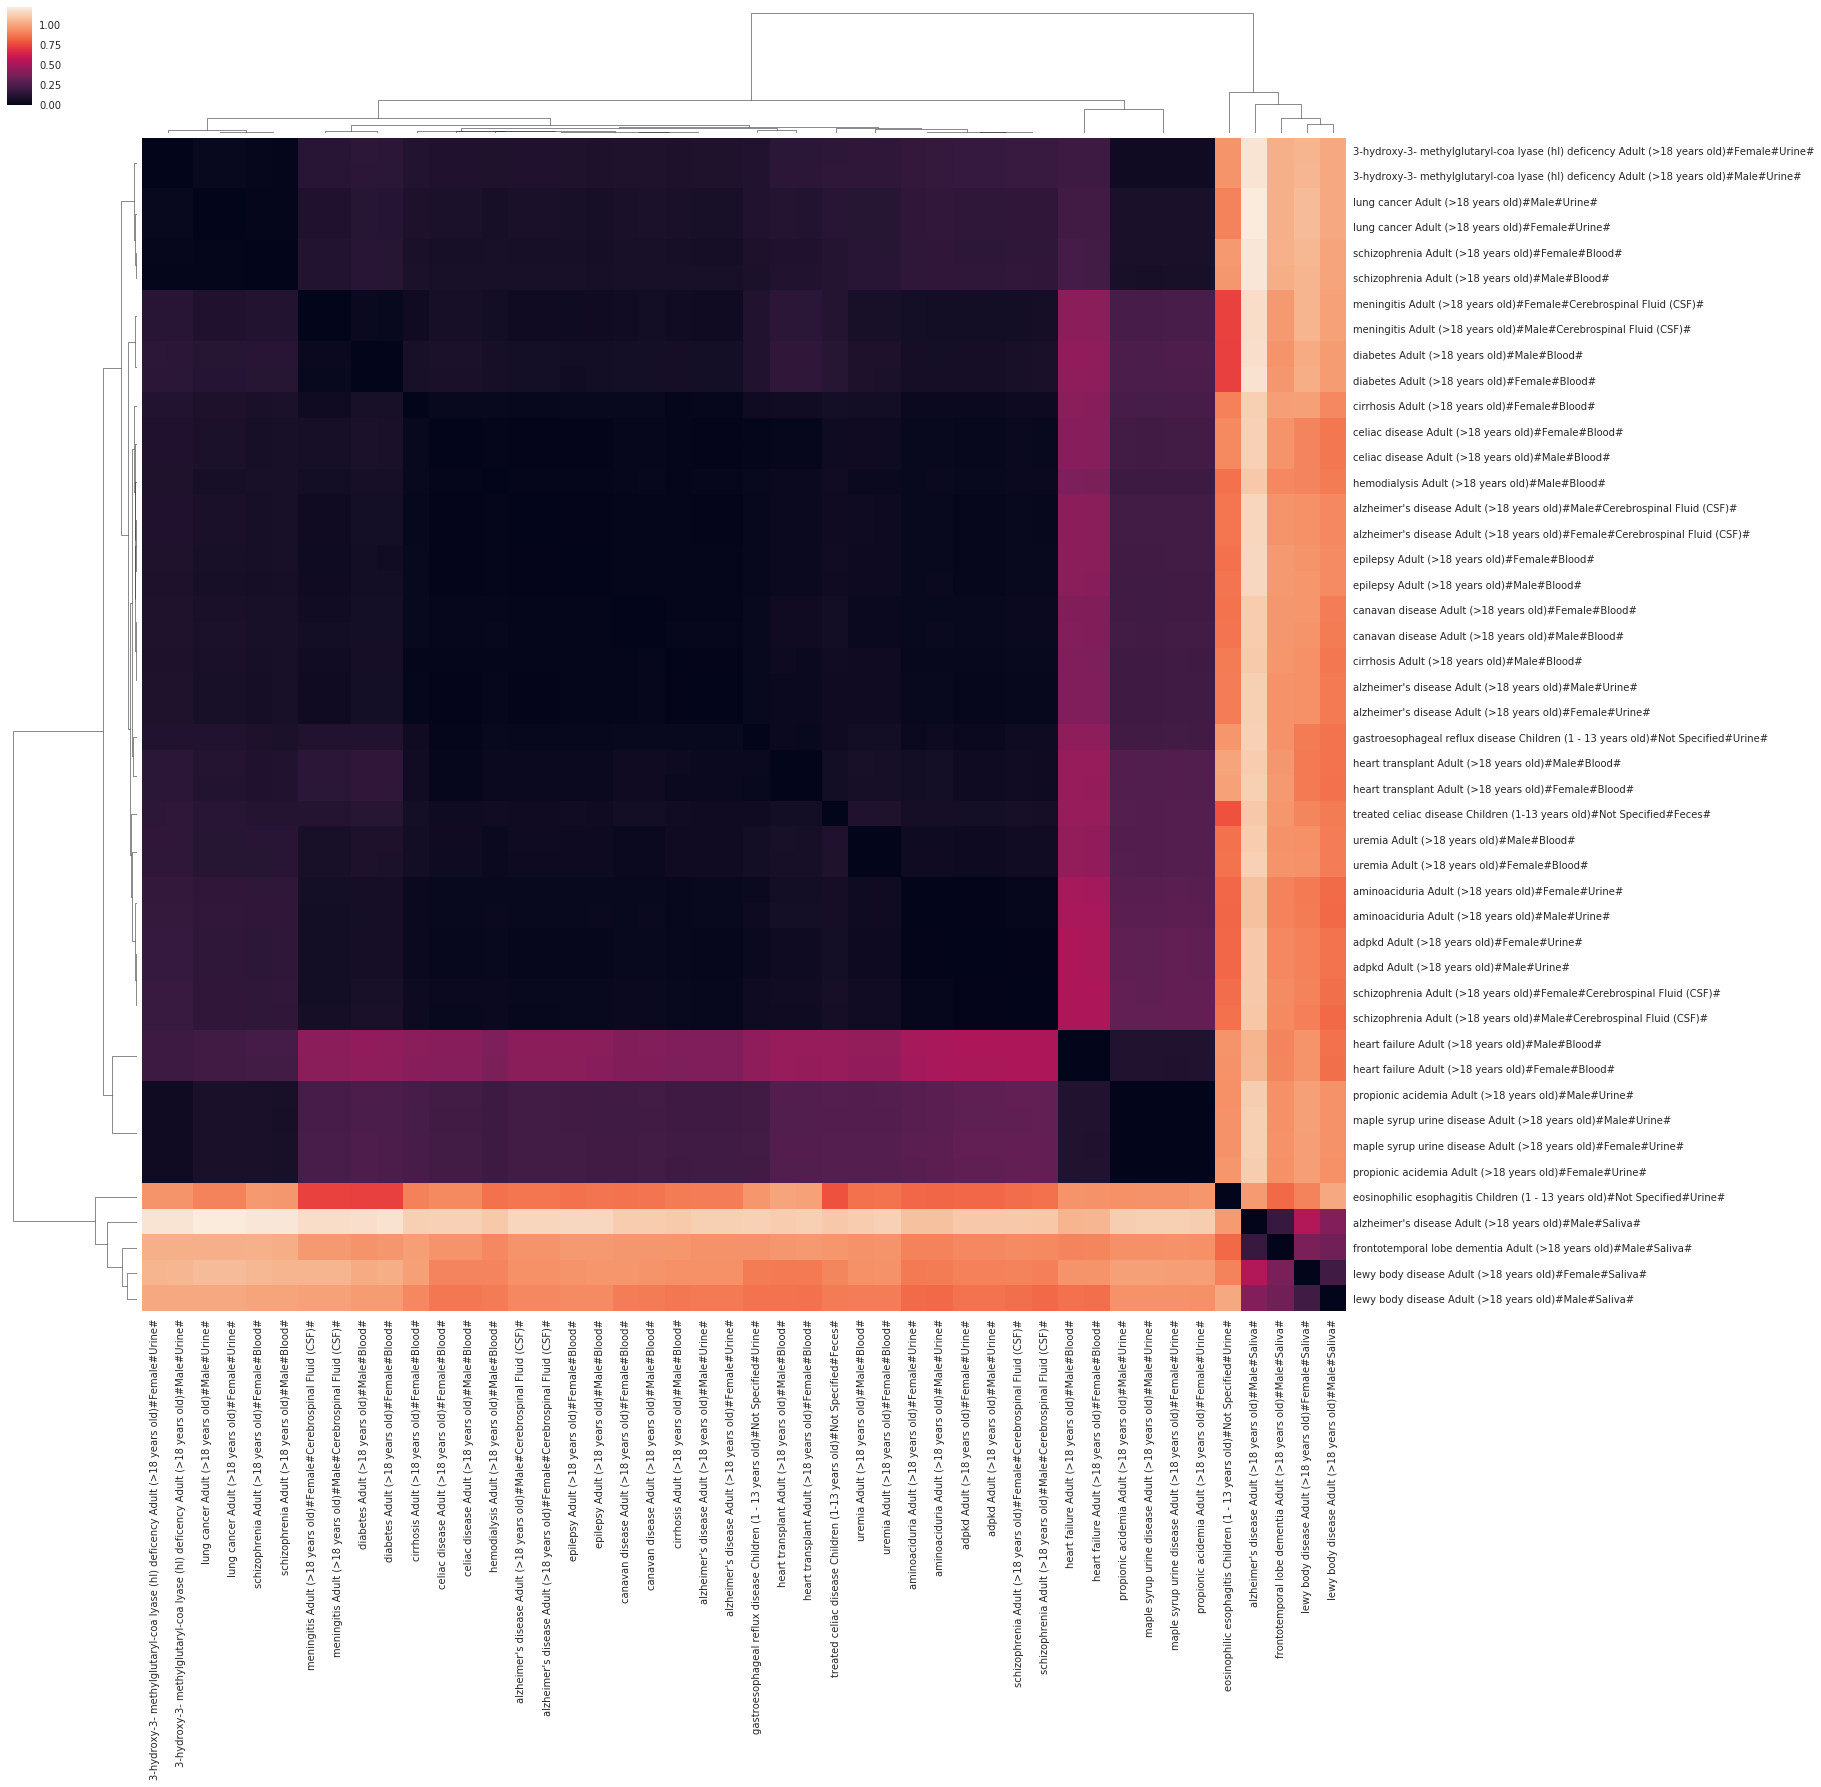

In [15]:
sns.clustermap(df_squareform, figsize=(24, 24))

In [16]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer

pca = PCA(n_components=2)
vect = DictVectorizer(sparse=False)
X_pca = pca.fit_transform(vect.fit_transform(X_results))

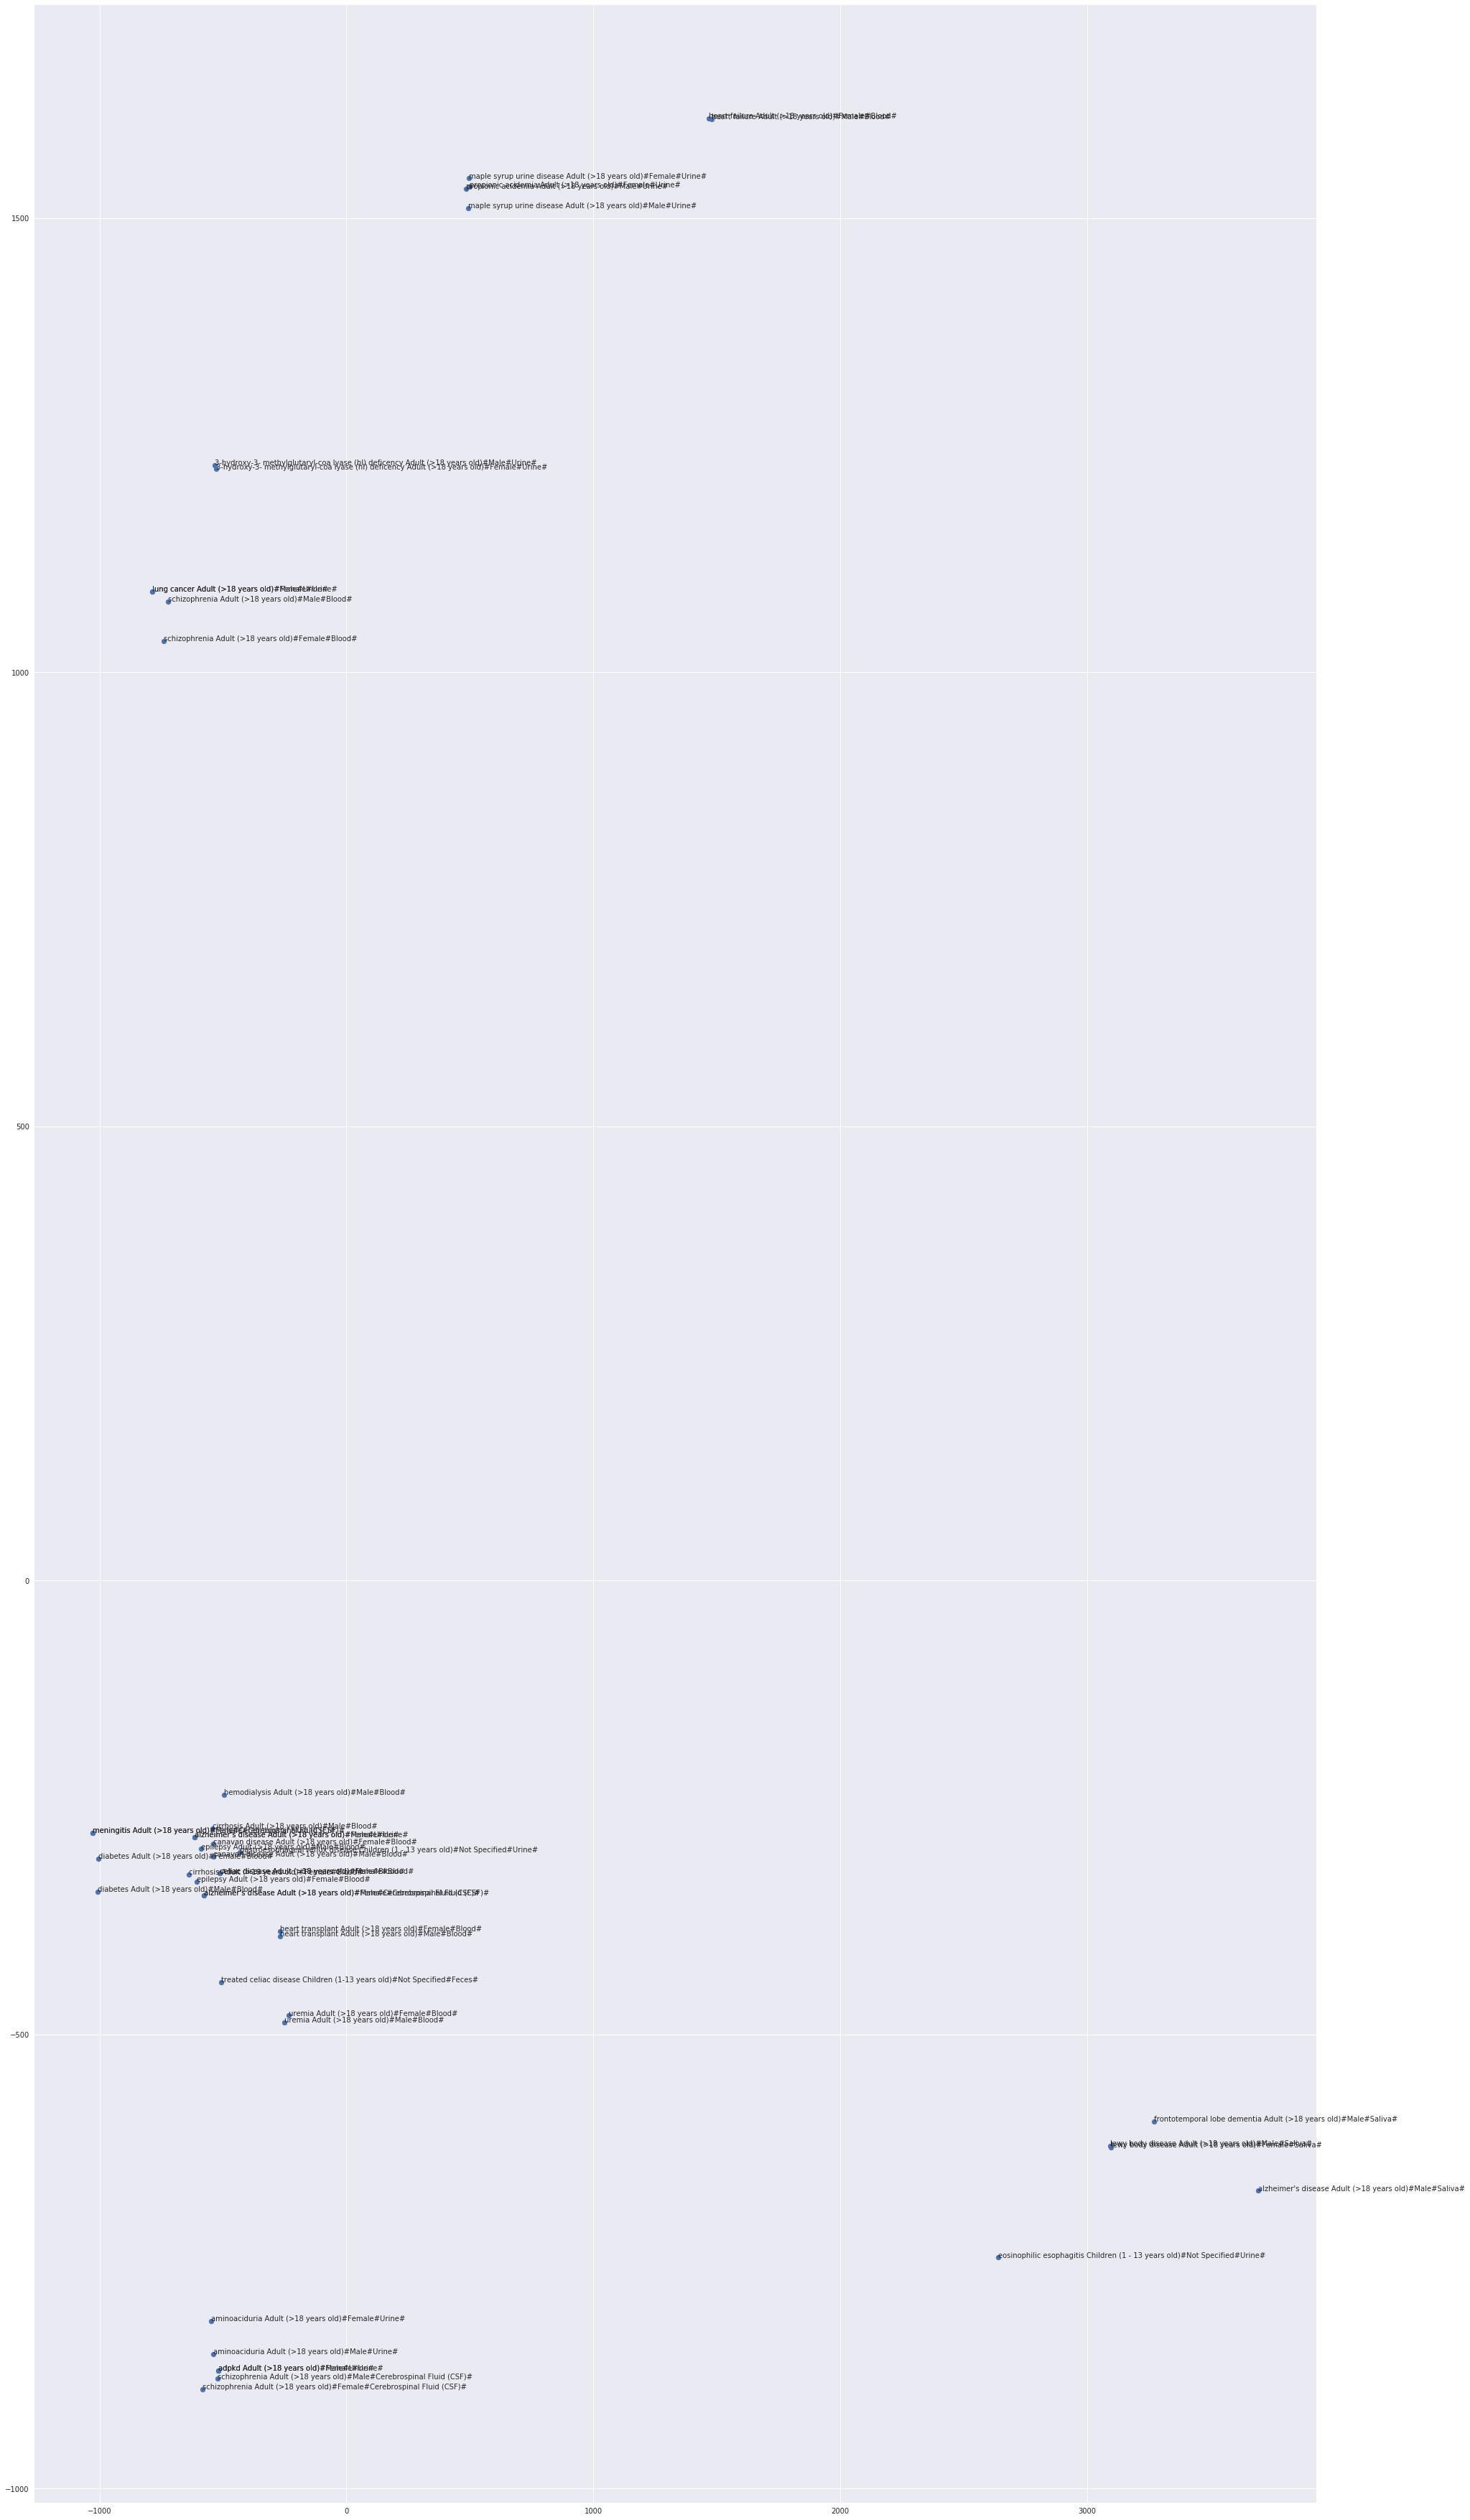

In [17]:
%matplotlib inline

pc1, pc2 = zip(*X_pca)

fig, ax = plt.subplots(figsize=(32, 64))
ax.scatter(pc1, pc2)

for i, txt in enumerate(y_results):
    ax.annotate(txt, (pc1[i], pc2[i]))

plt.show()

In [18]:
df_row.filter(like="Saliva").dropna(how="all")

,lewy body disease Adult (>18 years old)#Female#Saliva#,lewy body disease Adult (>18 years old)#Male#Saliva#,frontotemporal lobe dementia Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Saliva#
3pg_c,0.325,NaN,NaN,NaN
4abut_e,3.439,NaN,NaN,NaN
HC00342_m,6.493,14.814,11.616,15.279
ade_e,-2.108,-2.216,-0.368,-0.155
adn_l,-0.020,0.250,1.000,0.667
ala_L_c,0.358,0.257,0.357,0.500
amp_e,11.835,2.745,2.382,0.264
arg_L_c,-1.504,1.419,2.202,1.641
asn_L_l,0.716,0.392,-1.237,-0.292
asp_L_m,-0.035,NaN,NaN,NaN
